<a href="https://colab.research.google.com/github/Fawzy-AI-Explorer/Hotel_reservations-Classifications/blob/main/Hotel_Reservations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **classification project**



# Import Libraries

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns

# Import Dataset


In [124]:
data = pd.read_csv("/content/Hotel Reservations.csv")

# Some informations about Data

In [125]:
#First 5 rows of our dataset
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [126]:
#Number of rows and columns
data.shape

(36275, 19)

dataset consists of 36275 rows and 19 columns

In [127]:
# types of columns
data.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

as we see we have :


*   5 columns :
*   List item



In [128]:
#Description of our dataset
data.describe().T



,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [129]:
#the skewness of our dataset

data.skew()

<ipython-input-129-91e0ce7b2260>:3: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



no_of_adults                            -0.333295
no_of_children                           4.710350
no_of_weekend_nights                     0.737616
no_of_week_nights                        1.599350
required_car_parking_space               5.413643
lead_time                                1.292492
arrival_year                            -1.669695
arrival_month                           -0.348229
arrival_date                             0.028809
repeated_guest                           6.002888
no_of_previous_cancellations            25.199876
no_of_previous_bookings_not_canceled    19.250191
avg_price_per_room                       0.667133
no_of_special_requests                   1.145081
dtype: float64



*  Skewness tells us about the symmetry in a distribution.
*  If Skewness is equal to zero , It is a symmetrical distribution.
*   And If Skewness is less than or more than zero then it is a non-symmetrical distribution.
*   If value is less than zero , distribution is left skewed and value is more than zero , distribution is right skewed.

in the data :



*   no_of_previous_cancellations
*   no_of_previous_bookings_not_canceled
*   required_car_parking_space
*   no_of_children                                                             
Are highly positively,right skewed.











In [130]:
#Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

The above information tells us


*  Our dataset features consists of three datatypes


1.   integer
2.   float
3.   object



*   Of which total numerical features are 14
*   And categorical features are 5.



*  I see that the type of  all columns  is correct.



In [131]:
def is_non_numeric(x):
    return not x.isnumeric()



mask = data['Booking_ID'].apply(is_non_numeric)  # true --> if it is non num , false --> if it is num
mask



data_non_numeric = data[mask]
data_non_numeric

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [132]:
#Drop Id column as it is not required

data.drop(columns=['Booking_ID'],axis=1,inplace=True)

# Null Values

In [133]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [134]:
data.isnull().sum().sum()

0

*   We don not have missing values in dataset .






In [135]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Target Feature : booking_status

In [136]:
data['booking_status'].describe()

count            36275
unique               2
top       Not_Canceled
freq             24390
Name: booking_status, dtype: object

In [137]:
data['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [138]:
data['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

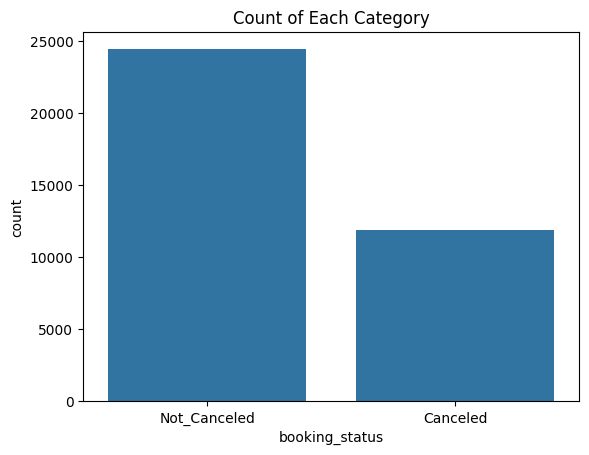

In [139]:
# Countplot
sns.countplot(data=data, x='booking_status')
plt.title('Count of Each Category')
plt.show()




*   Our target feature is a discrete variable with values ['Not_Canceled', 'Canceled']

---





#   Booking Status with Other Features

---










I will take numerical and categorical features and analyze the highly correlated features with our target feature.


**Numerical Analysis**                                                          
There are two types of numerical features :

*   Discrete and Continuous                                                     
If there are discrete features in our dataset, we need to separate them and analyze as categorical variables.                                             

Because if they are included in numerical analysis , we won't find any correlation between discrete features and target feature.    
                                                                                



                  


First step , I will separate discrete features

In [140]:
discrete_features=[]
for col in data.columns:
    if data[col].dtype=='int64' and len(data[col].unique()) <=6:
        discrete_features.append(col)

In [141]:
discrete_features

['no_of_adults',
 'no_of_children',
 'required_car_parking_space',
 'arrival_year',
 'repeated_guest',
 'no_of_special_requests']

As I see, there are incorrect columns , so I will add the discrete features manually

In [142]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [143]:
for col in data.columns :
  print (f"{col} : {data[col].unique()} \n\n")

no_of_adults : [2 1 3 0 4] 


no_of_children : [ 0  2  1  3 10  9] 


no_of_weekend_nights : [1 2 0 4 3 6 5 7] 


no_of_week_nights : [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16] 


type_of_meal_plan : ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3'] 


required_car_parking_space : [0 1] 


room_type_reserved : ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3'] 


lead_time : [224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303  81  54  15 161 147  87 127 418 156  58
 433 111 195 119  59  78 335 103  70  7

I select these columns :
*   arrival_year
*   arrival_month
*   arrival_date
*   required_car_parking_space
*   repeated_guest



as I will create Date_Time list and add in it :
*   arrival_year
*   arrival_month
*   arrival_date

so remain :


*   required_car_parking_space
*   repeated_guest

I will convert them to object and then put them back again



In [144]:
discrete_features = [ "arrival_year" ,  "arrival_month" , "arrival_date" , "required_car_parking_space" , "repeated_guest" ]


In [145]:
for col in discrete_features:
    print(f"{col} has {data[col].unique()} unique values\n\n")

arrival_year has [2017 2018] unique values


arrival_month has [10 11  2  5  4  9 12  7  6  8  3  1] unique values


arrival_date has [ 2  6 28 20 11 13 15 26 18 30  5 10  4 25 22 21 19 17  7  9 27  1 29 16
  3 24 14 31 23  8 12] unique values


required_car_parking_space has [0 1] unique values


repeated_guest has [0 1] unique values






*   Visualize Discrete Features with booking_status



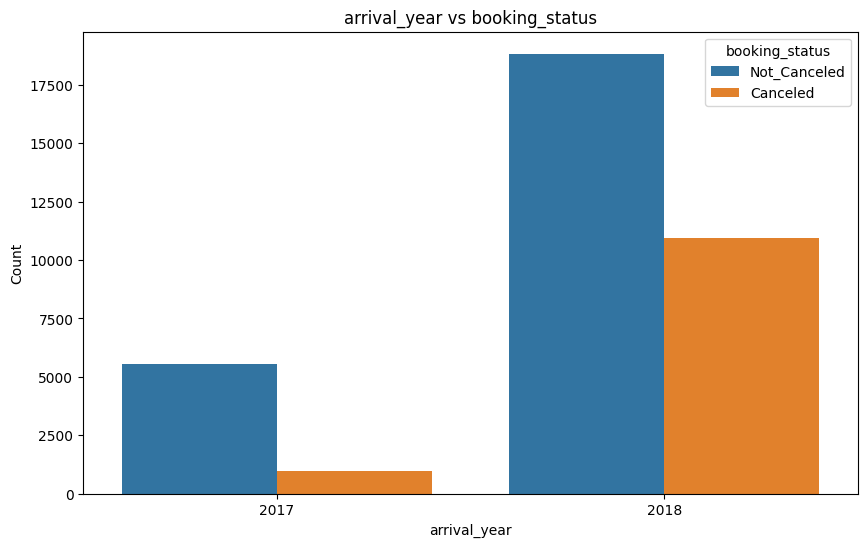

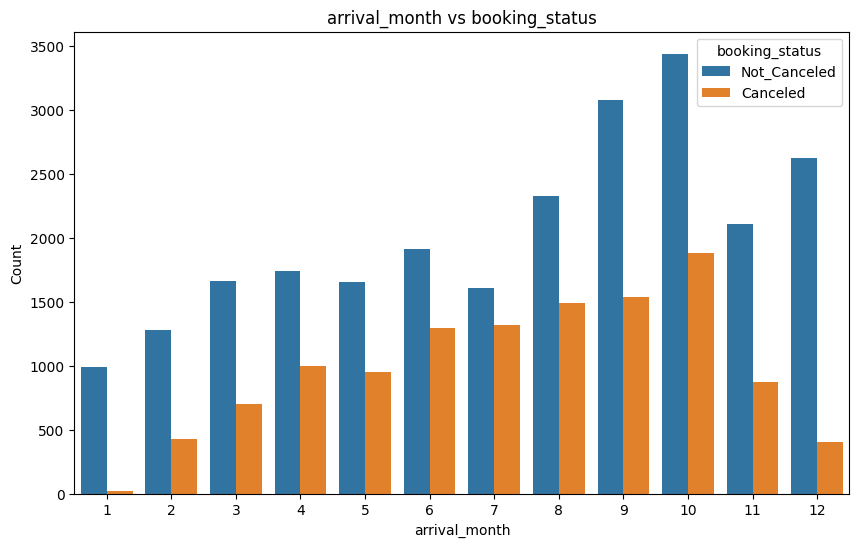

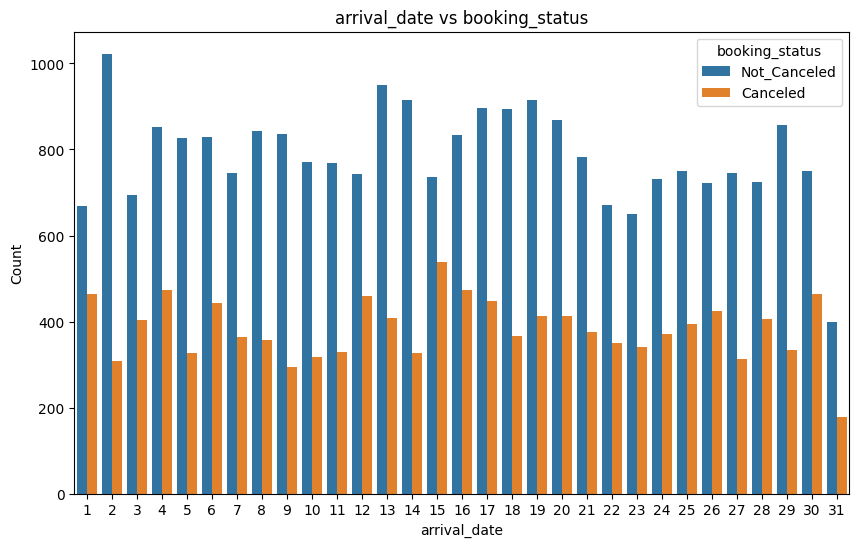

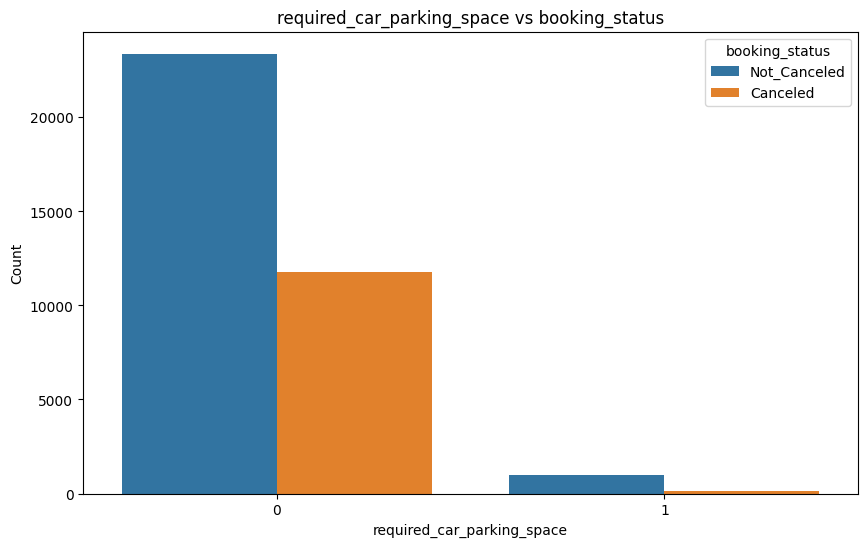

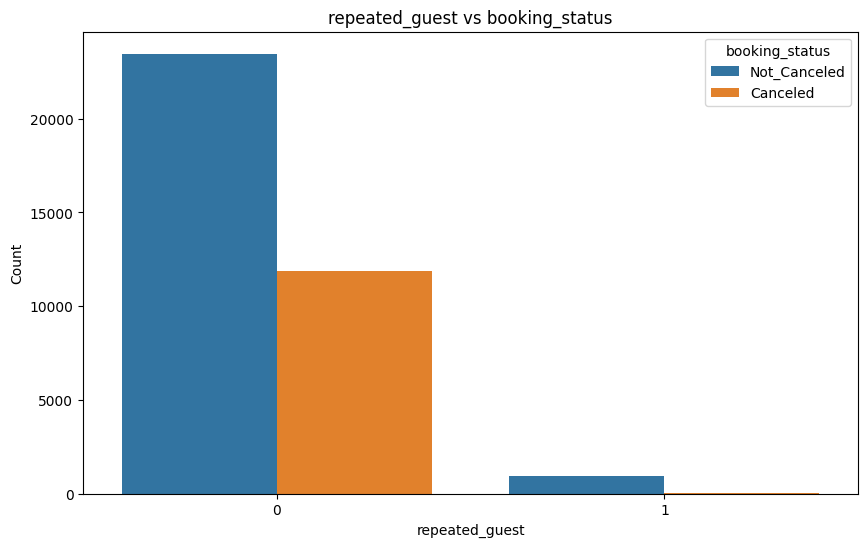

In [146]:
# Iterate through each feature and create plots
for feature in discrete_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='booking_status', data=data)
    plt.title(f'{feature} vs booking_status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='booking_status', loc='upper right')
    plt.show()

I will analyze the rest of the continuous numerical features.


In [147]:
continuous_features = []
for col in data.columns:
    if (data[col].dtype=='int64' or data[col].dtype=='float64') and col not in discrete_features:
        continuous_features.append(col)


In [148]:
#printing the list
print(f"continuous variables :: \n\n{continuous_features}")

continuous variables :: 

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


I'll have a look at the correlation between all the features with the help of Heatmap.                                                                   
Heatmap will tell us which features are positively ,negatively and have no correlation with our target feature (booking_status).

<ipython-input-149-4973938cac0d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-149-4973938cac0d>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



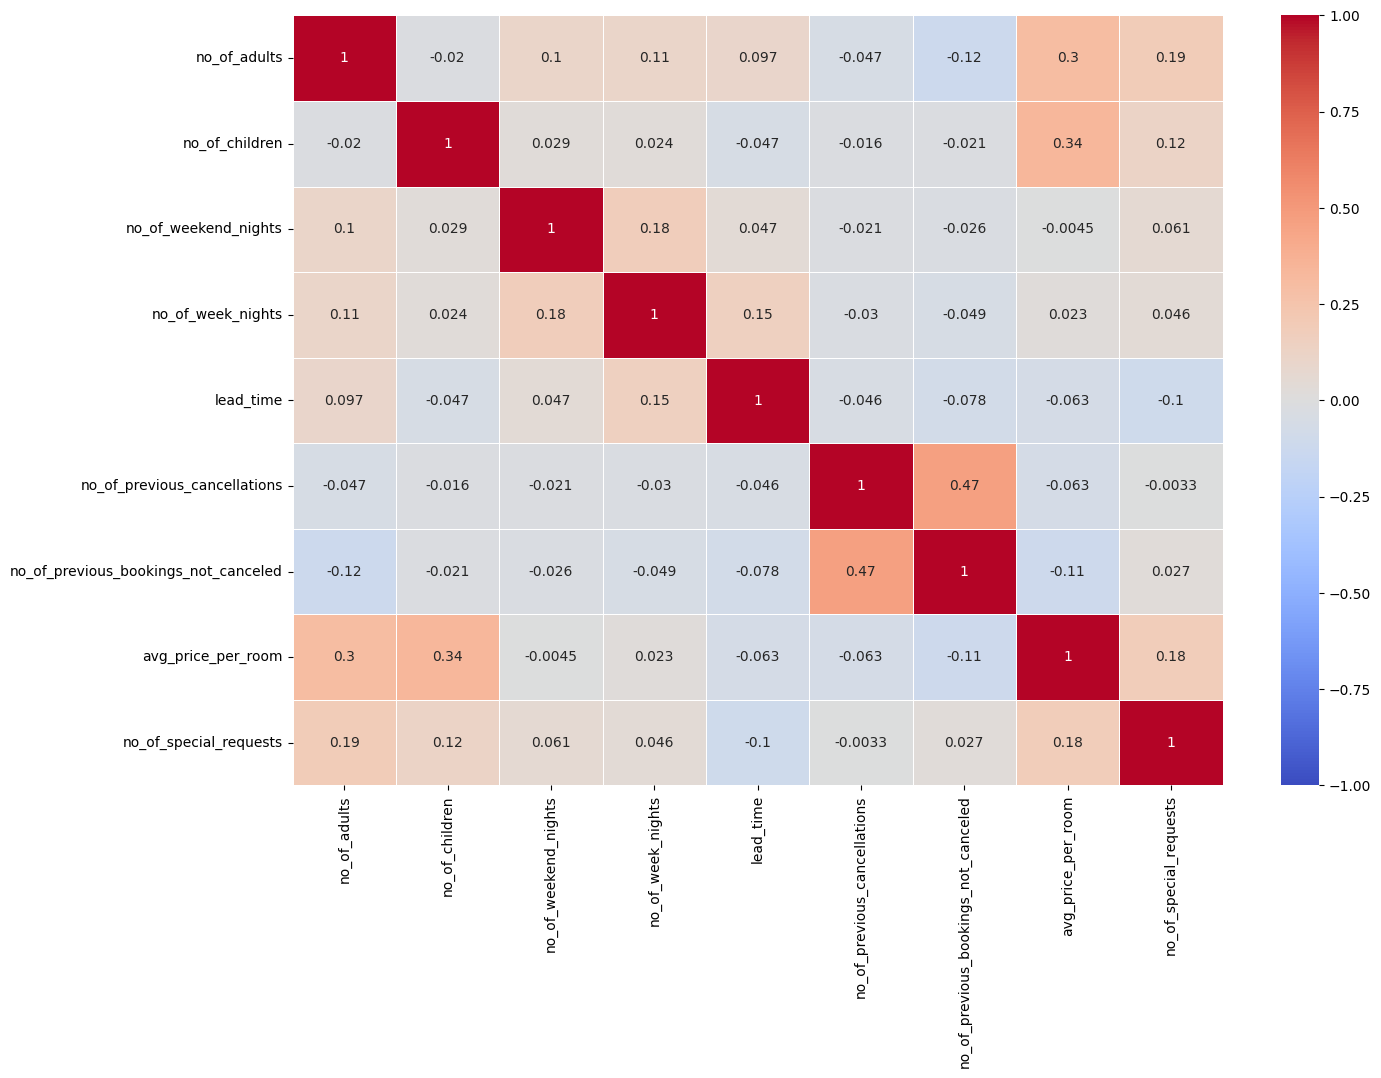

In [149]:

data_corr = data[continuous_features]
data_corr['booking_status'] = data['booking_status']

corr = data_corr.corr()

fig = plt.figure(figsize=(15,10))

#Here we use cmap CoolWarm as it gives us a better view of postive and negative correlation.
#And with the help of vmin and vmax set to -1 and +1 , the features having values closer to +1 have positive correlation and features having values closer to -1 have negative correlation.
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

Because Target is not a number, it does not appear in correlation, so I have to change it to the first number (label encoding).

In [150]:
data.replace ({"booking_status" :{"Canceled" : 0 , "Not_Canceled" : 1}})

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,0
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,1
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,0


In [151]:
data["booking_status"]

0        Not_Canceled
1        Not_Canceled
2            Canceled
3            Canceled
4            Canceled
             ...     
36270    Not_Canceled
36271        Canceled
36272    Not_Canceled
36273        Canceled
36274    Not_Canceled
Name: booking_status, Length: 36275, dtype: object

ooooops !!!!

In [152]:
data = data.replace ({"booking_status" :{"Canceled" : 0 , "Not_Canceled" : 1}})

In [153]:
data["booking_status"]

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int64

<ipython-input-154-4973938cac0d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



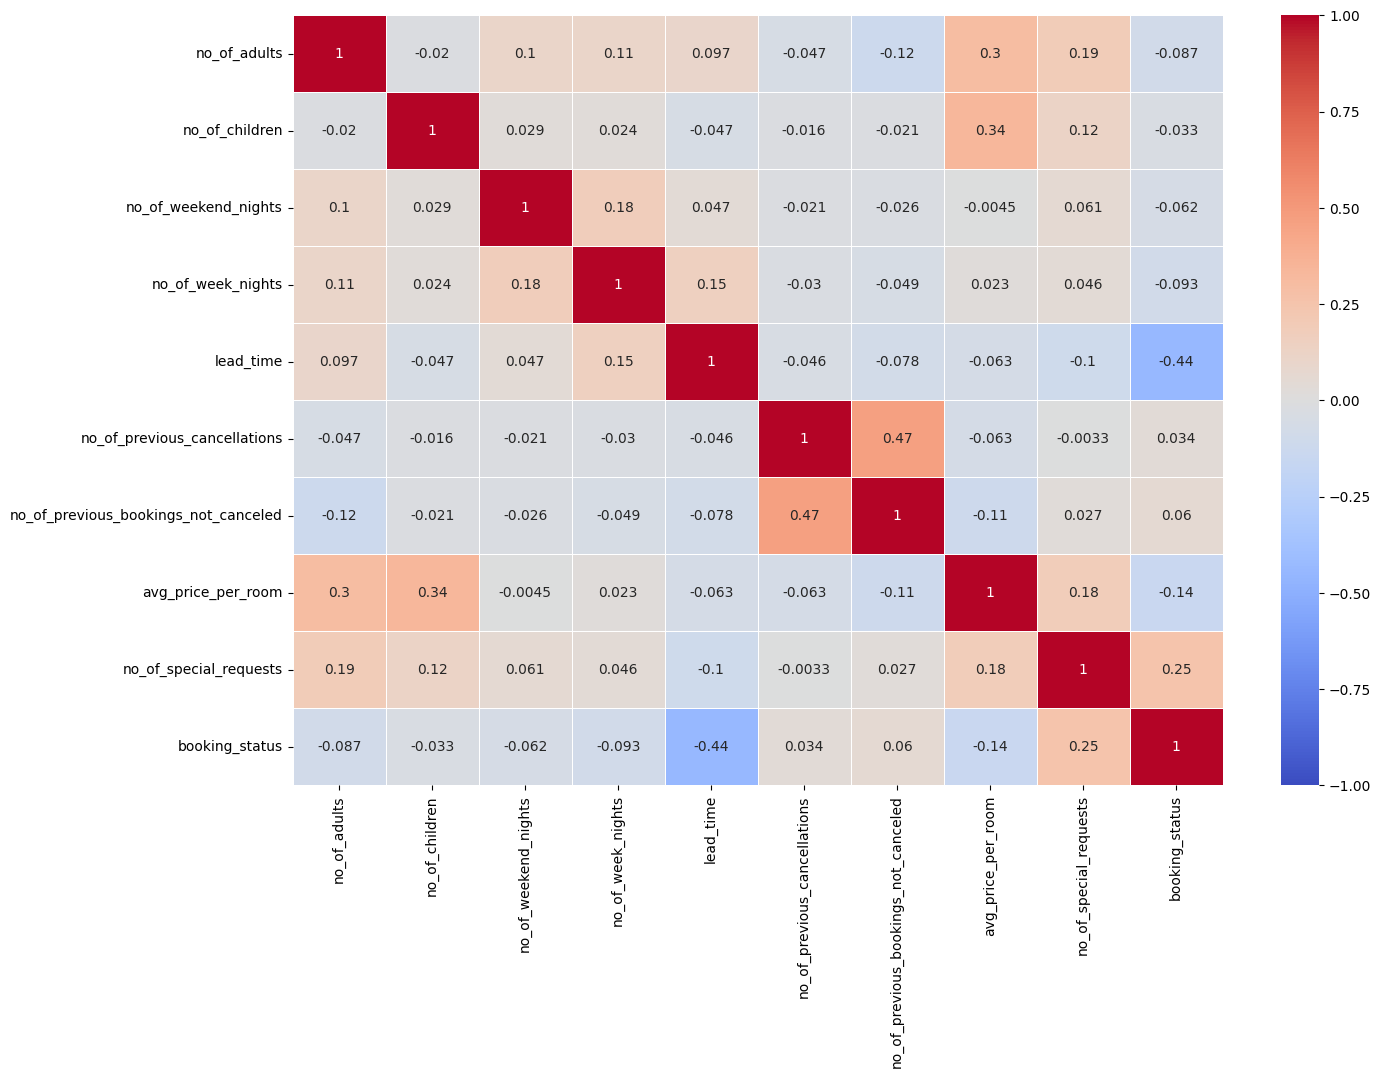

In [154]:

data_corr = data[continuous_features]
data_corr['booking_status'] = data['booking_status']

corr = data_corr.corr()

fig = plt.figure(figsize=(15,10))

#Here we use cmap CoolWarm as it gives us a better view of postive and negative correlation.
#And with the help of vmin and vmax set to -1 and +1 , the features having values closer to +1 have positive correlation and features having values closer to -1 have negative correlation.
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);



*   **positive correlation :**
1.   no_of_special_requests
2.   no_of_previous_bookings_not_canceled
3.   no_of_previous_cancellations


*   **negative correlation :**
1.   no_of_adults
2.   no_of_children
3.   no_of_weekend_nights
4.   no_of_week_nights
5.   lead_time
6.   avg_price_per_room









In [155]:
fig = make_subplots(rows=2, cols=2)

# Add traces for each subplot
fig.add_trace(go.Scatter(y=data['booking_status'], x=data['no_of_special_requests'], name='no_of_special_requests', mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(y=data['booking_status'], x=data['no_of_previous_bookings_not_canceled'], name='no_of_previous_bookings_not_canceled', mode='markers'), row=1, col=2)
fig.add_trace(go.Scatter(y=data['booking_status'], x=data['no_of_previous_cancellations'], name='no_of_previous_cancellations', mode='markers'), row=2, col=1)

# Update layout
fig.update_layout(height=1000, showlegend=True, title_text="Positive Correlated features with Sale Price")

# Show figure
fig.show()


In [156]:

filtered_data = data[(data["no_of_children"] > 0) & (data["no_of_adults"] == 0 )]
filtered_data[["no_of_children" , "no_of_adults", "booking_status"]]


,no_of_children,no_of_adults,booking_status
32,2,0,1
287,2,0,0
653,2,0,1
937,2,0,1
954,2,0,1
...,...,...,...
34720,2,0,1
34730,2,0,0
34890,2,0,1
35691,2,0,0


as we see there is children with out adults !!                                  
so i will remove these rows

In [157]:
rows_to_drop = data[(data["no_of_children"] > 0) & (data["no_of_adults"] == 0)].index
data = data.drop(rows_to_drop)
data = data.reset_index(drop=True)


In [158]:
data[(data["no_of_children"] > 0) & (data["no_of_adults"] == 0 )]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [159]:
filtered_data_ = data[(data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] == 0 ) &(data["booking_status"] == 1) ]
filtered_data_[["no_of_weekend_nights" , "no_of_week_nights"]]


,no_of_weekend_nights,no_of_week_nights
208,0,0
1153,0,0
1397,0,0
1900,0,0
1979,0,0
...,...,...
33092,0,0
33409,0,0
34614,0,0
35335,0,0


no_of_weekend_nights = 0  and no_of_week_nights and the booking not canceled !!!!!!!

In [160]:
rows_to_drop = data[(data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] == 0 )&(data["booking_status"] == 1)].index
data = data.drop(rows_to_drop)
data = data.reset_index(drop=True)


In [161]:
data[(data["no_of_weekend_nights"] == 0) & (data["no_of_week_nights"] == 0 )&(data["booking_status"] == 1)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


# **Categorical Analysis**


In [162]:
categorical_features=[]
for col in data.columns:
    if data[col].dtype=='object':
        categorical_features.append(col)

In [163]:
#printing the list
print(f"Categorical variables :: \n\n{categorical_features}")

Categorical variables :: 

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


In [164]:
for i in categorical_features :
  print (f"{i} :: \n{data[i].value_counts()}\n\n")

type_of_meal_plan :: 
Meal Plan 1     27643
Not Selected     5114
Meal Plan 2      3298
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64


room_type_reserved :: 
Room_Type 1    28065
Room_Type 4     6048
Room_Type 6      962
Room_Type 2      557
Room_Type 5      265
Room_Type 7      156
Room_Type 3        7
Name: room_type_reserved, dtype: int64


market_segment_type :: 
Online           23017
Offline          10527
Corporate         2017
Complementary      374
Aviation           125
Name: market_segment_type, dtype: int64




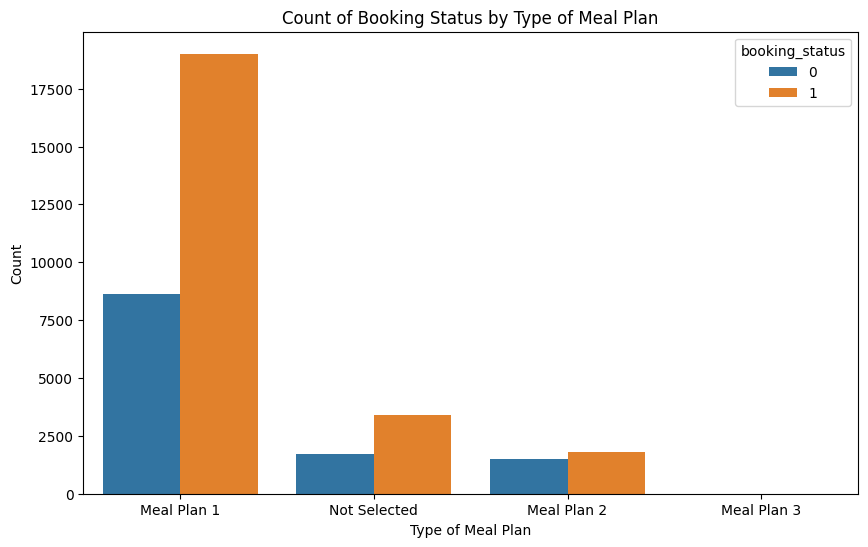

In [165]:

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type_of_meal_plan', hue='booking_status')

# Add labels and title
plt.xlabel('Type of Meal Plan')
plt.ylabel('Count')
plt.title('Count of Booking Status by Type of Meal Plan')

# Show the plot
plt.show()


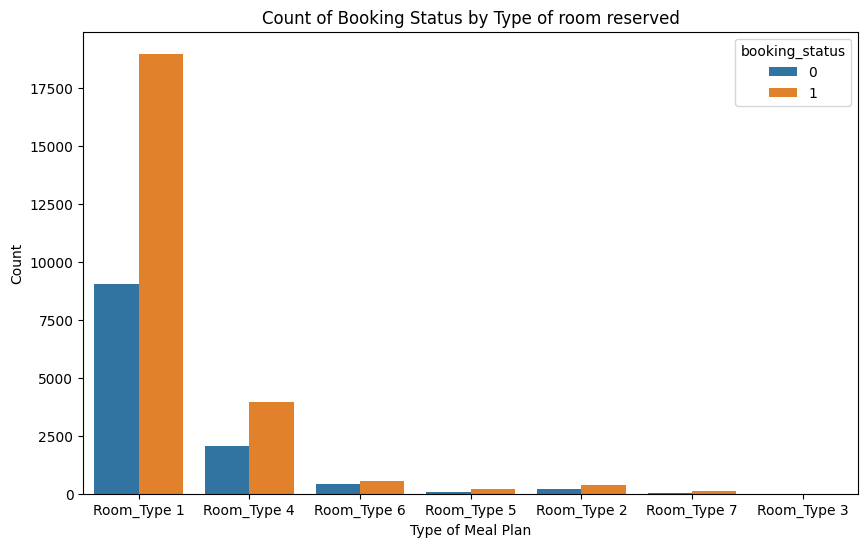

In [166]:

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='room_type_reserved', hue='booking_status')

# Add labels and title
plt.xlabel('Type of Meal Plan')
plt.ylabel('Count')
plt.title('Count of Booking Status by Type of room reserved')

# Show the plot
plt.show()

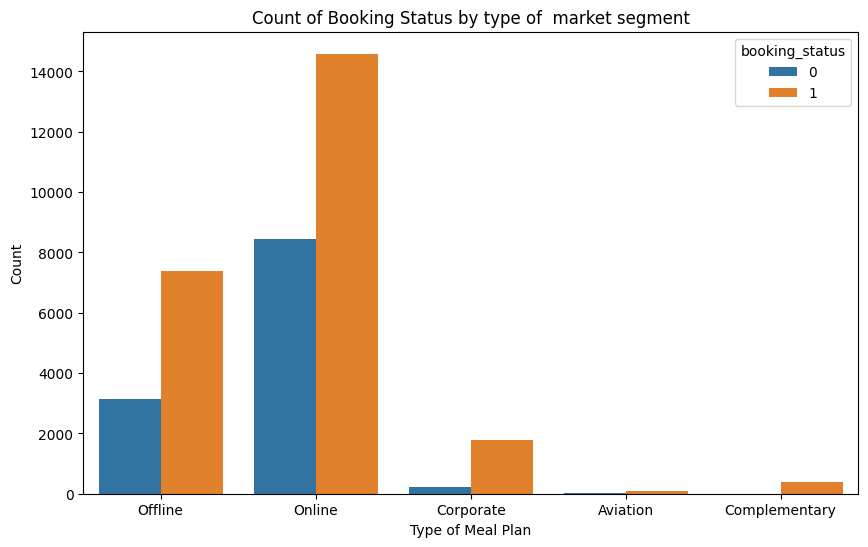

In [167]:

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='market_segment_type', hue='booking_status')

# Add labels and title
plt.xlabel('Type of Meal Plan')
plt.ylabel('Count')
plt.title('Count of Booking Status by type of  market segment')

# Show the plot
plt.show()

# **Label encoding**

In [168]:
data = data.replace({"type_of_meal_plan" : {"Not Selected" : 0, "Meal Plan 1" : 1 , "Meal Plan 2" : 2 , "Meal Plan 3" :3} ,
                     "room_type_reserved" :  {"Room_Type 1" : 1 ,"Room_Type 2" : 2 , "Room_Type 3" : 3 , "Room_Type 4" : 4 , "Room_Type 5" : 5 , "Room_Type 6" : 6 , "Room_Type 7" : 7 },
                     "market_segment_type" : {"Offline" : 1  , "Online" : 2 , "Corporate" : 3 ,"Aviation" : 4  , "Complementary" : 5 },
                     #"booking_status" :{"Canceled" : 0 , "Not_Canceled" : 1}
                     })


In [169]:
data.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [170]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,1,0,0,0,65.00,0,1
1,2,0,2,3,0,0,1,5,2018,11,6,2,0,0,0,106.68,1,1
2,1,0,2,1,1,0,1,1,2018,2,28,2,0,0,0,60.00,0,0
3,2,0,0,2,1,0,1,211,2018,5,20,2,0,0,0,100.00,0,0
4,2,0,1,1,0,0,1,48,2018,4,11,2,0,0,0,94.50,0,0


In [171]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

# **feature extraction**

I can get the weather status from the arrival_month


this data from Portugal so after searching :


*   Summer (June to August)
*   Fall (September to November)
*   Winter (December to February)
*   Spring (March to May)






In [172]:
date_features = ['arrival_year','arrival_month','arrival_date']

#printing the list
print(f"Categorical variables :: \n\n{date_features}")

Categorical variables :: 

['arrival_year', 'arrival_month', 'arrival_date']


In [173]:
for i in date_features :
  print(f"{i} ::\n{data[i].value_counts()}\n\n")

arrival_year ::
2018    29578
2017     6482
Name: arrival_year, dtype: int64


arrival_month ::
10    5286
9     4593
8     3787
6     3191
12    2992
11    2965
7     2903
4     2723
5     2588
3     2348
2     1684
1     1000
Name: arrival_month, dtype: int64


arrival_date ::
13    1351
17    1338
2     1328
19    1320
4     1317
16    1297
20    1275
6     1269
15    1264
18    1255
14    1234
30    1210
12    1197
8     1186
29    1183
5     1148
21    1148
25    1138
26    1137
1     1127
28    1125
9     1124
7     1100
3     1097
11    1095
24    1093
10    1084
27    1050
22    1017
23     981
31     572
Name: arrival_date, dtype: int64




In [174]:
# Summer (June to August)
# Fall (September to November):
# Winter (December to February)
# Spring (March to May)



def assign_temperature(month):
    # Summer
    if (month >=6 )& (month <=8):
        return 1  # Average high in Lisbon for simplicity
    # Fall
    elif 9 <= month <= 11:
        return 2  # Average high in September for simplicity
    # Winter
    elif month == 12 or 1 <= month <= 2:
        return 3  # Average high in the north for simplicity
    # Spring
    elif 3 <= month <= 5:
        return 4  # Average high for simplicity
    else:
        return None

data['temperature'] = data.apply(lambda x :assign_temperature(x["arrival_month"]), axis=1)


In [175]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,temperature
0,2,0,1,2,1,0,1,224,2017,10,2,1,0,0,0,65.00,0,1,2
1,2,0,2,3,0,0,1,5,2018,11,6,2,0,0,0,106.68,1,1,2
2,1,0,2,1,1,0,1,1,2018,2,28,2,0,0,0,60.00,0,0,3
3,2,0,0,2,1,0,1,211,2018,5,20,2,0,0,0,100.00,0,0,4
4,2,0,1,1,0,0,1,48,2018,4,11,2,0,0,0,94.50,0,0,4


Total Number of Nights = (no_of_weekend_nights) + (no_of_week_nights)

In [176]:
def Total_Number_Nights (no_of_weekend_nights , no_of_week_nights):
    return (no_of_weekend_nights + no_of_week_nights)

data['Total_Number_Nights'] = data.apply(lambda x :Total_Number_Nights(x["no_of_weekend_nights"] , x["no_of_week_nights"]), axis=1)

In [177]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,temperature,Total_Number_Nights
0,2,0,1,2,1,0,1,224,2017,10,2,1,0,0,0,65.00,0,1,2,3.0
1,2,0,2,3,0,0,1,5,2018,11,6,2,0,0,0,106.68,1,1,2,5.0
2,1,0,2,1,1,0,1,1,2018,2,28,2,0,0,0,60.00,0,0,3,3.0
3,2,0,0,2,1,0,1,211,2018,5,20,2,0,0,0,100.00,0,0,4,2.0
4,2,0,1,1,0,0,1,48,2018,4,11,2,0,0,0,94.50,0,0,4,2.0


Total Guests = 	(no_of_adults) + (no_of_children)

In [178]:
def Total_Guests (no_of_adults , no_of_children):
    return (no_of_adults + no_of_children)

data['Total_Guests'] = data.apply(lambda x :Total_Number_Nights(x["no_of_adults"] , x["no_of_children"]), axis=1)


In [179]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,temperature,Total_Number_Nights,Total_Guests
0,2,0,1,2,1,0,1,224,2017,10,...,1,0,0,0,65.00,0,1,2,3.0,2.0
1,2,0,2,3,0,0,1,5,2018,11,...,2,0,0,0,106.68,1,1,2,5.0,2.0
2,1,0,2,1,1,0,1,1,2018,2,...,2,0,0,0,60.00,0,0,3,3.0,1.0
3,2,0,0,2,1,0,1,211,2018,5,...,2,0,0,0,100.00,0,0,4,2.0,2.0
4,2,0,1,1,0,0,1,48,2018,4,...,2,0,0,0,94.50,0,0,4,2.0,2.0


In [180]:
data.shape

(36060, 21)

# **Separating target  and features variables from the dataset**

In [181]:
#Selecting features & target variable
data_input = data.drop (columns='booking_status')
data_output = data ['booking_status']

# **Feature Selection**

In [182]:
from sklearn.feature_selection import SelectKBest, f_classif

In [183]:
selector = SelectKBest(f_classif, k=15)
data_input = selector.fit_transform(data_input, data_output)

In [184]:
selected_indices = selector.get_support(indices=True)
# Get the names of the selected features
selected_features = data.columns[selected_indices]

# Print the names of the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights',
       'type_of_meal_plan', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'market_segment_type', 'repeated_guest',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'temperature',
       'Total_Number_Nights'],
      dtype='object')


([<matplotlib.axis.XTick at 0x78caf3e78a60>,
 [Text(0, 0, 'no_of_adults'),
  Text(1, 0, 'no_of_weekend_nights'),
  Text(2, 0, 'no_of_week_nights'),
  Text(3, 0, 'type_of_meal_plan'),
  Text(4, 0, 'required_car_parking_space'),
  Text(5, 0, 'lead_time'),
  Text(6, 0, 'arrival_year'),
  Text(7, 0, 'market_segment_type'),
  Text(8, 0, 'repeated_guest'),
  Text(9, 0, 'no_of_previous_bookings_not_canceled'),
  Text(10, 0, 'avg_price_per_room'),
  Text(11, 0, 'no_of_special_requests'),
  Text(12, 0, 'booking_status'),
  Text(13, 0, 'temperature'),
  Text(14, 0, 'Total_Number_Nights')])

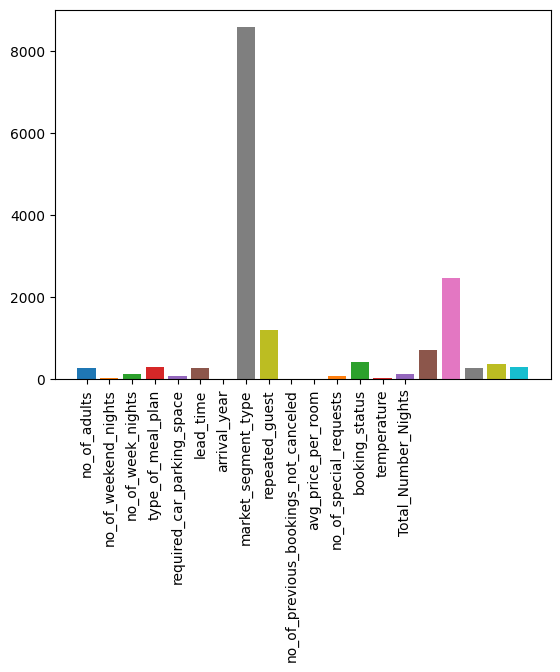

In [185]:
for i,j in enumerate(selector.scores_):
    plt.bar(i,j)
plt.xticks(range(data_input.shape[1]), selected_features , rotation=90)

# **Train Test Split**

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
# Getting test data
x_train, x_test, y_train, y_test = train_test_split(
    data_input,
    data_output,
    test_size=0.2,
    random_state=1
)

In [188]:
print('Train size =', x_train.shape)
print('Test size =', x_test.shape)

Train size = (28848, 15)
Test size = (7212, 15)


# **Feature Scaling**

*   There are two types of popular feature scaling methods :-
1.   Standard Scaler
2.   MinMax Scaler

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. ... StandardScaler makes the mean of the distribution 0.             

MinMaxScaler shrinks the range such that the range is now between 0 and 1.      

We can use any one of them , in this exercise  I will go with StandardScaler.

In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
scaler = StandardScaler()
scaler.fit(x_train)
#--------------------------------------------
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [191]:
x_train_scaled

array([[ 0.29157748,  0.21809859, -0.14933034, ...,  1.55486396,
        -0.0114521 ,  0.074853  ],
       [ 0.29157748, -0.93275344, -0.86090642, ..., -1.20175074,
        -1.13707494,  0.074853  ],
       [ 0.29157748,  0.21809859, -0.14933034, ...,  1.55486396,
        -0.0114521 ,  0.074853  ],
       ...,
       [ 0.29157748,  1.36895061, -0.14933034, ...,  1.55486396,
         0.55135931,  0.074853  ],
       [ 0.29157748, -0.93275344, -0.86090642, ..., -0.28287917,
        -1.13707494,  0.074853  ],
       [ 0.29157748,  0.21809859,  0.56224575, ...,  1.55486396,
         0.55135931,  0.074853  ]])

In [192]:
x_test_scaled

array([[ 0.29157748,  1.36895061,  1.98539791, ..., -1.20175074,
         2.23979357,  3.13343583],
       [ 0.29157748,  1.36895061, -0.14933034, ...,  1.55486396,
         0.55135931,  0.074853  ],
       [ 0.29157748,  0.21809859,  0.56224575, ...,  1.55486396,
         0.55135931,  0.074853  ],
       ...,
       [ 0.29157748, -0.93275344, -0.14933034, ...,  1.55486396,
        -0.57426352,  0.074853  ],
       [-1.68200939, -0.93275344, -0.14933034, ...,  1.55486396,
        -0.57426352, -1.45443841],
       [ 0.29157748, -0.93275344, -0.14933034, ..., -0.28287917,
        -0.57426352,  0.074853  ]])

# **Model Building**

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#--------------------------------------------------------
from sklearn.metrics import accuracy_score
#--------------------------------------------------------
from sklearn.model_selection import GridSearchCV
#--------------------------------------------------------
from sklearn.ensemble import VotingClassifier



**helper functions to run models and Grid Search**

In [194]:
def eval_classifier(model):
    model.fit(x_train_scaled, y_train)
    y_pred_train = model.predict(x_train_scaled)
    y_pred_test  = model.predict(x_test_scaled)
    acc_train    = accuracy_score(y_train, y_pred_train)
    acc_test     = accuracy_score(y_test, y_pred_test)
    print(model.__class__.__name__)
    print(f"acc train: {acc_train} and acc test : {acc_test}\n\n")
    print('----------------------------')
    return acc_train , acc_test

#----------------------------------------------------------------------------------------------------------------------------------------
def Grid_search (model , param_grid) :
  try:
    grid_search = GridSearchCV( estimator = model  , param_grid = param_grid, cv=5, scoring='accuracy', verbose=1 , n_jobs=-1 )
    grid_search.fit(x_train_scaled, y_train)
    best_model      = grid_search.best_estimator_
    best_parameters = grid_search.best_params_
    best_score      = grid_search.best_score_
    # print("Best Parameters:", best_parameters)
    # print("Best Score:", best_score)
    y_pred_train = best_model.predict(x_train_scaled)
    y_pred_test = best_model.predict(x_test_scaled)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    return best_model , best_parameters , best_score  , acc_train ,acc_test
  except Exception as e:
      print("Error during grid search:", e)
      return -1, -1, -1, -1

# **Applying Decision Tree Classifier Model**

> Indented block



In [195]:

DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini', splitter='best' ,max_depth=5, random_state=33)
acc_train , acc_test= eval_classifier (DecisionTreeClassifierModel)


DecisionTreeClassifier
acc train: 0.8323627287853578 and acc test : 0.8344425956738769


----------------------------


In [196]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [197]:

best_model , best_parameters , best_score , acc_train , acc_test = Grid_search (DecisionTreeClassifierModel , param_grid)
print (f"best_model ::\n{best_model}\n\nbest_parameters ::\n{best_parameters}\n\nbest_score :: {best_score}\n\nacc train :: {acc_train}\n\nacc_test :: {acc_test}\n\n ")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
best_model ::
DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=33)

best_parameters ::
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}

best_score :: 0.866472471492736

acc train :: 0.8786051026067665

acc_test :: 0.865363283416528

 


# **Applying SVC Model**

In [198]:
SVCModel = SVC( C = 1.0 ,
               kernel = 'rbf',
                degree = 4 ,
                max_iter = 200 ,
                gamma = 'auto',probability=True)



acc_train , acc_test = eval_classifier (SVCModel)



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



SVC
acc train: 0.5970604547975596 and acc test : 0.5935940099833611


----------------------------


In [199]:

param_grid = {
    'C': [0.1, 1,2,3, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type
    'max_iter': [100 , 200 , 300 , 400 , 500],        # Maximum number of iterations
    'gamma': ['scale', 'auto'],     # Kernel coefficient
}


In [ ]:

best_model , best_parameters , best_score , acc_train , acc_test = Grid_search (SVCModel , param_grid)

print (f"best_model ::\n{best_model}\n\nbest_parameters ::\n{best_parameters}\n\nbest_score ::{best_score}\n\nacc_test ::{acc_test}\n\n ")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


# **Applying KNeighborsClassifier Model**

In [ ]:

KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', algorithm='auto')
acc_train , acc_test = eval_classifier (KNNClassifierModel)


In [ ]:

param_grid = {
    'n_neighbors': [3, 5, 7],       # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute nearest neighbors
}


In [81]:

best_model , best_parameters , best_score , acc_train ,acc_test = Grid_search (KNNClassifierModel , param_grid)
print (f"best_model ::\n{best_model}\n\nbest_parameters ::\n{best_parameters}\n\nbest_score :: {best_score}\n\nacc train :: {acc_train}\n\nacc_test :: {acc_test}\n\n ")


best_model ::
KNeighborsClassifier(algorithm='brute', n_neighbors=7, weights='distance')

best_parameters ::
{'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'distance'}

best_score :: 0.8646702133827698

acc train :: 0.9931711037160288

acc_test :: 0.8698003327787022

 


#**Applying RandomForestClassifier Model**


In [ ]:

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=8, min_samples_split = 2 , random_state = 33 ) #criterion can be also : entropy
acc_train , acc_test = eval_classifier (RandomForestClassifierModel)


In [ ]:

param_grid = {
    'n_estimators': [50, 100, 150 , 200],      # Number of trees in the forest
    'criterion': ['gini', 'entropy'],    # Criterion for split
    'max_depth': [2, 3, 4, 5,6,7,8,9],               # Maximum depth of the tree
    'min_samples_split': [2, 3, 4,5,6],       # Minimum number of samples required to split a node
}


In [ ]:

best_model , best_parameters , best_score , acc_train , acc_test = Grid_search (RandomForestClassifierModel , param_grid)
print (f"best_model ::\n{best_model}\n\nbest_parameters ::\n{best_parameters}\n\nbest_score :: {best_score}\n\nacc train :: {acc_train}\n\nacc_test :: {acc_test}\n\n ")


# **Applying LogisticRegression Model**

In [ ]:

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
acc_train , acc_test = eval_classifier (LogisticRegressionModel)


In [ ]:

param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}


In [ ]:

best_model , best_parameters , best_score , acc_train , acc_test = Grid_search (LogisticRegressionModel , param_grid)
print (f"best_model ::\n{best_model}\n\nbest_parameters ::\n{best_parameters}\n\nbest_score :: {best_score}\n\nacc train :: {acc_train}\n\nacc_test :: {acc_test}\n\n ")


In [ ]:
#DecisionTreeClassifier , SVC , KNeighborsClassifier , RandomForestClassifier , LogisticRegressionModel

# **Applying VotingClassifier Model**

In [ ]:

VotingClassifierModel = VotingClassifier(estimators=[( 'DecisionTreeClassifier'  , DecisionTreeClassifierModel  ) ,
                                                     ( 'RandomForestClassifier'  , RandomForestClassifierModel   ) ,
                                                     ( 'LogisticRegressionModel' , LogisticRegressionModel  ) ,
                                                     ( 'SVCModel'                , SVCModel                      ) ,
                                                     ( 'KNNModel'                , KNNClassifierModel     )],
                                                       voting = 'hard' )


acc_train , acc_test = eval_classifier (VotingClassifierModel)

